In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import pandas as pd

In [15]:
df=pd.read_csv("해외포트폴리오종가.csv", index_col='rdate')

In [85]:
c=pd.read_csv("c.csv", index_col='rdate')

In [5]:
df1=pd.read_csv("ALL월별지수.csv")

In [42]:
df1=pd.read_csv("일별지수.csv", index_col='rdate')

In [81]:
df2=pd.read_csv("일별지수1.csv", index_col='rdate')

In [159]:
dd=pd.read_csv("dd.csv", index_col='rdate')

In [16]:
df.head()

,311,221,131,122,113
rdate,,,,,
2018-12-18,30.688846,35.725822,34.125924,36.370696,136.235633
2018-12-19,30.299691,35.195003,34.125924,35.873559,132.965350
2018-12-20,29.493043,34.030891,33.091745,34.785815,130.931912
2018-12-21,28.319047,32.445548,31.569556,33.173439,126.773620
2018-12-24,27.860548,31.921807,31.095138,32.744609,123.368113


In [44]:
bb = pd.merge(df,df1,on='rdate',how='left')

In [82]:
cc = pd.merge(bb,df2,on='rdate',how='left')

In [134]:
dd = pd.merge(df3,df2,on='rdate',how='left')

In [136]:
dd.bfill(inplace=True)

In [137]:
dd.to_csv("dd.csv")

In [83]:
cc.bfill(inplace=True)

In [215]:
dd.head()

,311,221,131,122,113,DFF,KOSPI,KOSDAQ,USDKRW,DOW,NASDAQ,S&P500,GOLD,WTI,TEDRATE,KORIR
rdate,,,,,,,,,,,,,,,,
2018-12-19,-0.15977,-0.17655,-0.01533,-0.13078,-0.15299,2.2,2078.840088,672.080017,1125.069946,23323.66016,6636.830078,2506.959961,1252.099976,47.200001,0.44,1.75
2018-12-20,-0.18675,-0.21018,-0.04611,-0.16157,-0.16840,2.4,2060.120117,668.130005,1128.130005,22859.59961,6528.410156,2467.419922,1263.599976,45.880001,0.48,1.75
2018-12-21,-0.22737,-0.25789,-0.09320,-0.20903,-0.20067,2.4,2061.489990,673.640015,1120.030029,22445.36914,6332.990234,2416.620117,1253.800049,45.590000,0.48,1.75
2018-12-24,-0.24370,-0.27416,-0.10834,-0.22204,-0.22791,2.4,2055.010010,669.789978,1127.500000,21792.19922,6192.919922,2351.100098,1269.199951,46.220001,0.40,1.75
2018-12-26,-0.19741,-0.21908,-0.10834,-0.17303,-0.16791,2.4,2028.010010,665.739990,1122.630005,22878.44922,6554.359863,2467.699951,1269.199951,46.220001,0.40,1.75


In [233]:
window_size = 200
data_size = 16     

In [234]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [235]:
dfx = MinMaxScaler(dd)
dfy = dfx[['311']]

x = dfx.values.tolist()
y = dfy.values.tolist()

In [236]:
data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y) 
#마지막으로 data_x 리스트에 추가된 _x 값과 data_y 리스트에 추가된 _y값 확인

[[0.6042479345752454, 0.6300569002188023, 0.6232848508764351, 0.6248768021481418, 0.6756011998120746, 0.02074688710593829, 0.5043110167313627, 0.7086153680569339, 0.44803311551016345, 0.528315836071718, 0.5412894579739901, 0.49212307380059045, 0.8119839322381628, 0.68172957072271, 0.02985074404098925, 0.0], [0.6116999921707206, 0.6382343127199581, 0.6315335485212331, 0.6322921753298054, 0.6947223911391205, 0.02074688710593829, 0.4735680372193298, 0.6694075679836495, 0.4472520053292878, 0.53699045694592, 0.5631068332389801, 0.5083957767413487, 0.8087315242801729, 0.6842991001251557, 0.02985074404098925, 0.0], [0.5850635053108613, 0.6100731715719471, 0.604592712820634, 0.6053306004248723, 0.6613349984704116, 0.02074688710593829, 0.47391979765003606, 0.670586937500728, 0.43972075847156483, 0.5045688716487378, 0.5240789803312259, 0.4713094212406805, 0.7603202773033292, 0.6872230929193637, 0.02985074404098925, 0.0], [0.5847632674531923, 0.6099882849369869, 0.6039593306800513, 0.605089939226

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

In [239]:
# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1)) # Dropout층은 입력값의 일부분을 선택해서 그 값음0으로 치환하여 다음층으로 출력함으로써 훈련 데이터를 늘리지않고 과적합 방지 가능
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1)) # 유닛이 하나인 출력층을 추가
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=50, batch_size=30)
pred_y = model.predict(test_x)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 200, 10)           1080      
_________________________________________________________________
dropout_52 (Dropout)         (None, 200, 10)           0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_53 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 1,931
Trainable params: 1,931
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 6s 161ms/step - loss: 0.2113
Epoch 2/50
11/11 [==================

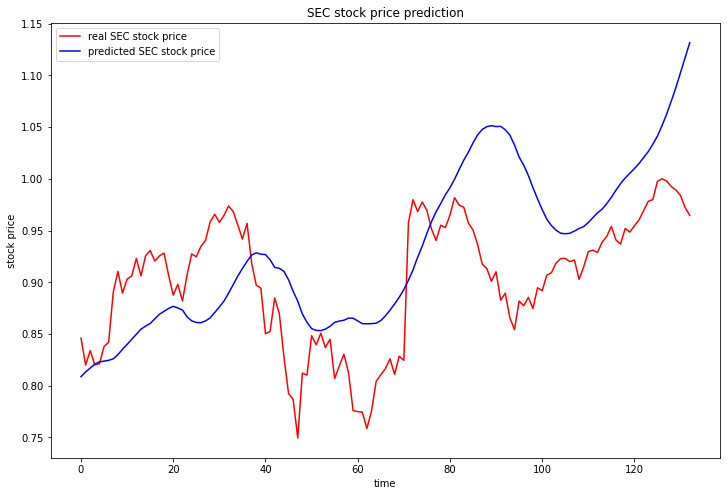

Tomorrow's SEC Return : [1.0957576] Return


In [240]:
# 실제 종가와 예측치를 그래프로 비교
plt.figure(figsize=(12,8))
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC Return :", dd['311'][-1] * pred_y[-1] / dfy['311'][-1], 'Return')